# 環境構築



*   GoogleDriveのマウント
*   Pythonモジュールへのパス追加
*   PyVista, KerasTunerのインストール





In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import sys
sys.path.append('/home/i9-10920x/ML/modules')

In [4]:
# !pip install keras-tuner --upgrade

In [5]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
import show_mod

# 前処理

In [6]:
#読み込むデータのパスの設定

data_path = '/home/i9-10920x/ML/MLTrial/data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")


In [7]:
#input(空調条件等)の読み込み
df_input = None

for input_fname in input_list:
    df_read = pd.read_csv(input_fname, index_col="case_name")
    if df_input is None:
        df_input = df_read
    else:
        df_input = df_input.append(df_read)

df_input

/tmp/ipykernel_73000/3757516117.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_input = df_input.append(df_read)
/tmp/ipykernel_73000/3757516117.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_input = df_input.append(df_read)
/tmp/ipykernel_73000/3757516117.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_input = df_input.append(df_read)
/tmp/ipykernel_73000/3757516117.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_input = df_input.append(df_read)
/tmp/ipykernel_73000/3757516117.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office2_960_164_aout,960,164,a,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_82_bout,960,82,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_246_bout,960,246,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_660_164_bout,660,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_0_164_bout,0,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office28_960_82_bout,960,82,b,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_660_0,660,0,off,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_360_246_aout,360,246,a,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00


In [8]:
#空調条件のみ抽出
df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

df_meta

,aircon,ventilation,exhaust
case_name,,,
office2_960_164_aout,960,164,a
office2_960_82_bout,960,82,b
office2_960_246_bout,960,246,b
office2_660_164_bout,660,164,b
office2_0_164_bout,0,164,b
...,...,...,...
office28_960_82_bout,960,82,b
office28_660_0,660,0,off
office28_360_246_aout,360,246,a


In [9]:
#排気口位置a,b,offをダミー変数化

df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# dummies = pd.get_dummies(df_input['exhaust'])
# df_input.drop("exhaust", axis=1, inplace=True)
# df_input = pd.concat([df_input, dummies], axis=1)
# df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
#           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
#           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
#           ,"aircon_position_x","aircon_position_y"])

df_meta

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,960,164,1,0,0
office2_960_82_bout,960,82,0,1,0
office2_960_246_bout,960,246,0,1,0
office2_660_164_bout,660,164,0,1,0
office2_0_164_bout,0,164,0,1,0
...,...,...,...,...,...
office28_960_82_bout,960,82,0,1,0
office28_660_0,660,0,0,0,1
office28_360_246_aout,360,246,1,0,0


In [10]:
#入力データフレームのインデックス順に、感染リスク分布ファイルを読み込むためのパスリスト作成
case_index_list = list(df_meta.index)

path2data = '/home/i9-10920x/ML/MLTrial/data'

distribution_path_list = []
for case_index in case_index_list:
    str_list = case_index.split('_', maxsplit=1)
    distribution_path_list.append(path2data + '/' + str_list[0] + '/data/' + str_list[1] + '/risk_dist.csv')

# distribution_path_list

In [11]:
#高さと幅の最大値の取得

max_height = 0
max_width = 0
for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    max_height = max(max_height, array_read.shape[0])
    max_width = max(max_width, array_read.shape[1])

print(max_height, max_width)

65 95


In [12]:
#−１パディングでサイズ合わせ
distributionArray_list = []

for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    array_padded = np.pad(array=array_read, pad_width=[(0, max_height - array_read.shape[0]), (0,  max_width - array_read.shape[1])],\
                        mode="constant", constant_values = (-1) )
    distributionArray_list.append(array_padded)

distributionArray_padded = np.array(distributionArray_list)
distributionArray_padded.shape

(263, 65, 95)

In [13]:
# np_output = np.empty((max_num_row, max_num_column))
# for i in range(num_output):
#     np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    
#     if np_temp.shape[0] < max_num_row :
#         nan = np.empty((max_num_row - int(np_temp.shape[0]), max_num_column))
#         nan[max_num_row - int(np_temp.shape[0]), max_num_column] = np.nan
#         np.insert(np_temp, int(np_temp.shape[0]) + 1 : max_num_row, :] = np.nan
#     if np_temp.shape[1] < max_num_column :
#         np_temp[:, int(np_temp.shape[1]) + 1:] = np.nan 
    
#     np_output = np.append(np_output, np_temp, axis=0)
    
# output = []
# for i in range(num_output):
#     with open (output_list[i], "r") as csv_fname:
#         reader = csv.reader(csv_fname)
#         temp_list = [row for row in reader]
#         output.append(temp_list)

In [14]:
#可視化用カラーマップの作成
cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
# cmap = show_mod.make_colormap(["blue", "white", "red"])

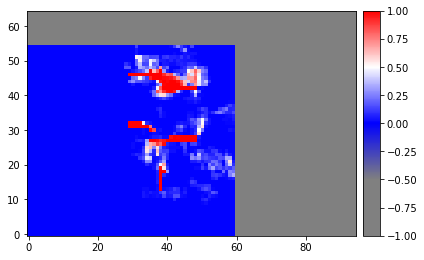

In [15]:
#選んだ1個をプロット
show_mod.show_image(distributionArray_padded[25], cbar=True, cmap=cmap)

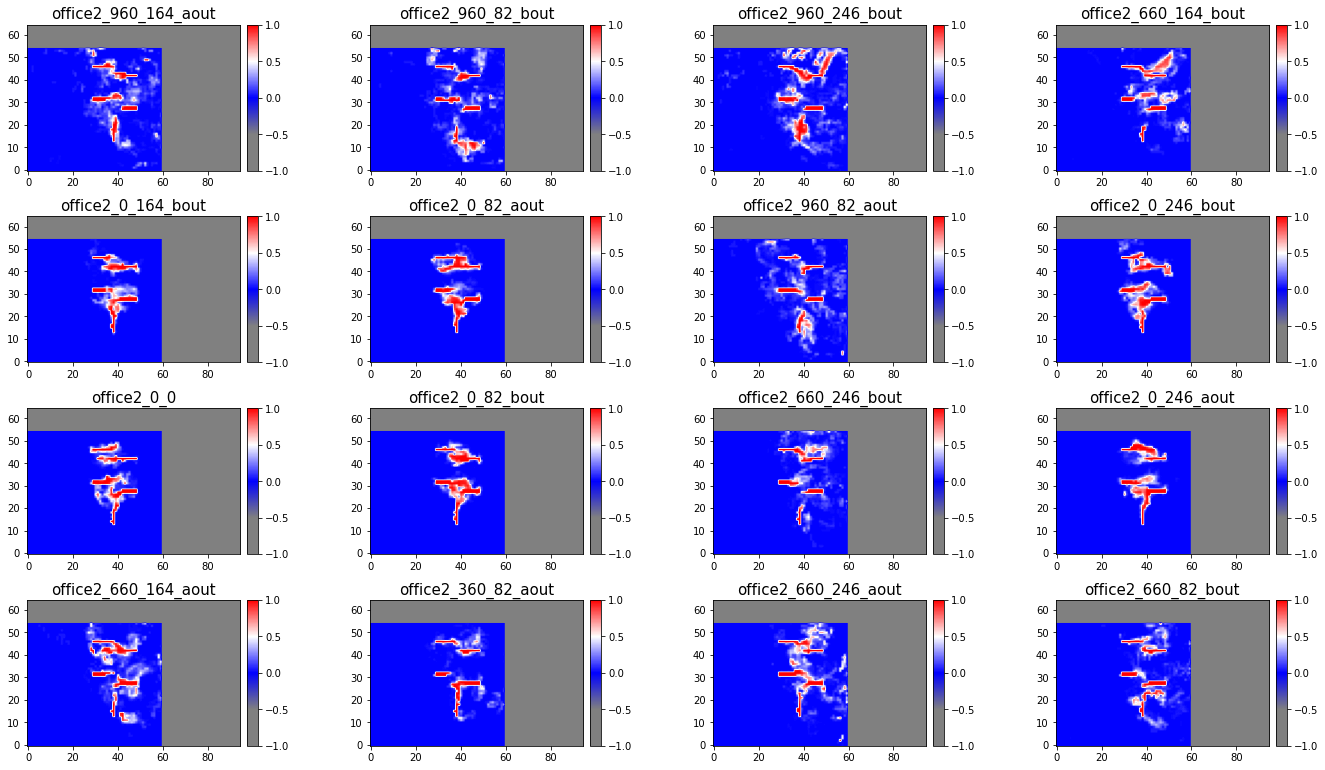

In [16]:
#複数プロット
show_mod.show_images(distributionArray_padded, title_name=case_index_list, row=4, column=4, cbar=True, cmap=cmap)

In [17]:
# np_output_2D = df_output_2D.to_numpy()
# np_output_3D = np_output_2D.reshape(office_list.shape[0], max_num_row, max_num_column)

In [18]:
# np_output_3D.shape

In [19]:
# plt.imshow(np_output_3D[0], cmap="bwr", origin="lower")

In [20]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_meta)
df_meta_tf = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_tf, index=df_meta.index, columns=df_meta.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,1.261546,0.294952,1.143249,-0.874700,-0.391802
office2_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office2_960_246_bout,1.261546,1.276880,-0.874700,1.143249,-0.391802
office2_660_164_bout,0.435795,0.294952,-0.874700,1.143249,-0.391802
office2_0_164_bout,-1.380856,0.294952,-0.874700,1.143249,-0.391802
...,...,...,...,...,...
office28_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office28_660_0,0.435795,-1.668904,-0.874700,-0.874700,2.552310
office28_360_246_aout,-0.389955,1.276880,1.143249,-0.874700,-0.391802


In [21]:
import numpy as np
import pointCloud_sampling as pcs

# rng = np.random.default_rng()

#予め点群をサンプリングしておいたものを取得
sampledPointCloud_dict = pcs.read_sampledPointCloud('/home/i9-10920x/ML/data/pointCloud_sampled')

sampledPointCloud_dict

{'office1': array([[1.107 , 2.073 , 0.7   ],
        [3.351 , 3.223 , 1.347 ],
        [3.775 , 2.427 , 0.5866],
        ...,
        [3.429 , 2.181 , 0.    ],
        [2.571 , 2.373 , 0.05  ],
        [3.251 , 3.485 , 0.8337]], dtype=float32),
 'office3': array([[0.2163, 3.612 , 0.    ],
        [4.915 , 3.894 , 1.452 ],
        [5.3   , 0.45  , 0.169 ],
        ...,
        [5.47  , 0.7804, 0.1317],
        [5.157 , 2.651 , 0.    ],
        [4.937 , 3.604 , 0.9034]], dtype=float32),
 'office22': array([[3.693 , 3.918 , 0.1951],
        [5.5   , 2.623 , 0.3624],
        [5.201 , 4.189 , 0.8347],
        ...,
        [5.507 , 2.542 , 0.4169],
        [4.744 , 2.955 , 0.7   ],
        [2.534 , 3.035 , 0.    ]], dtype=float32),
 'office2': array([[2.832 , 4.588 , 1.263 ],
        [3.1   , 1.55  , 0.4833],
        [2.709 , 3.093 , 1.244 ],
        ...,
        [2.759 , 3.36  , 0.48  ],
        [4.88  , 2.81  , 1.264 ],
        [4.204 , 1.661 , 0.75  ]], dtype=float32),
 'office16': array(

In [22]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office1': [array([[1.107 , 2.073 , 0.7   ],
         [3.351 , 3.223 , 1.347 ],
         [3.775 , 2.427 , 0.5866],
         ...,
         [3.429 , 2.181 , 0.    ],
         [2.571 , 2.373 , 0.05  ],
         [3.251 , 3.485 , 0.8337]], dtype=float32),
  array([[1.904 , 5.5   , 2.4   ],
         [1.388 , 1.21  , 1.285 ],
         [3.542 , 2.175 , 0.75  ],
         ...,
         [4.551 , 2.072 , 0.6946],
         [3.486 , 3.305 , 0.9821],
         [4.643 , 2.323 , 0.7461]], dtype=float32),
  array([[3.282 , 3.248 , 1.183 ],
         [1.813 , 3.2   , 1.203 ],
         [4.629 , 2.26  , 0.7484],
         ...,
         [3.072 , 1.7   , 0.1423],
         [3.507 , 1.525 , 0.1805],
         [2.025 , 2.784 , 0.1597]], dtype=float32),
  array([[3.345 , 3.435 , 0.9304],
         [1.586 , 1.67  , 0.1451],
         [5.554 , 0.    , 1.258 ],
         ...,
         [4.735 , 2.204 , 0.6139],
         [3.3   , 3.2   , 2.6   ],
         [4.935 , 2.219 , 1.385 ]], dtype=float32)],
 'office3': [array([[0.2

In [23]:
'''
点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
'''
case_index_augumented_list = []

pointCloudArray_list = []
metaArray_list = []

distributionArray_list = []

for ID, case_index in enumerate(case_index_list):
    office_name = case_index.split('_', maxsplit=1)[0]
    pc_list = pointCloud_augumented_dict[office_name]
    for augumentID, pointCloud in enumerate(pc_list):
        case_index_augumented_list.append(case_index + '-' + str(augumentID))
        pointCloudArray_list.append(pointCloud)
        metaArray_list.append(df_meta_standardized.loc[case_index])
        distributionArray_list.append(distributionArray_padded[ID, :,:])

case_index_array = np.array(case_index_augumented_list)
pointCloudArray = np.array(pointCloudArray_list)
metaArray = np.array(metaArray_list)
distributionArray = np.array(distributionArray_list)


In [24]:
print(case_index_array.shape)

print(pointCloudArray.shape)
print(metaArray.shape)

print(distributionArray.shape)

(1052,)
(1052, 2048, 3)
(1052, 5)
(1052, 65, 95)


In [25]:
'''
特定のofficeだけ、テスト用にとっておく。
学習にも、チューニング中の検証にも使わない。
'''

fit_ID = []
test_ID = []

for (ID, case_index) in enumerate(case_index_augumented_list):
    if 'office7_' not in case_index:
        fit_ID.append(ID)
    else:
        test_ID.append(ID)

print(case_index_array[test_ID])
        
case_index_fit = case_index_array[fit_ID]
X_pc_fit = pointCloudArray[fit_ID]
X_meta_fit = metaArray[fit_ID]
Y_fit = distributionArray[fit_ID]

case_index_test = case_index_array[test_ID]
X_pc_test = pointCloudArray[test_ID]
X_meta_test = metaArray[test_ID]
Y_test = distributionArray[test_ID]

['office7_360_164_bout-0' 'office7_360_164_bout-1'
 'office7_360_164_bout-2' 'office7_360_164_bout-3'
 'office7_660_246_aout-0' 'office7_660_246_aout-1'
 'office7_660_246_aout-2' 'office7_660_246_aout-3' 'office7_660_82_bout-0'
 'office7_660_82_bout-1' 'office7_660_82_bout-2' 'office7_660_82_bout-3'
 'office7_660_82_aout-0' 'office7_660_82_aout-1' 'office7_660_82_aout-2'
 'office7_660_82_aout-3' 'office7_660_164_bout-0' 'office7_660_164_bout-1'
 'office7_660_164_bout-2' 'office7_660_164_bout-3' 'office7_0_164_aout-0'
 'office7_0_164_aout-1' 'office7_0_164_aout-2' 'office7_0_164_aout-3'
 'office7_0_82_aout-0' 'office7_0_82_aout-1' 'office7_0_82_aout-2'
 'office7_0_82_aout-3' 'office7_660_164_aout-0' 'office7_660_164_aout-1'
 'office7_660_164_aout-2' 'office7_660_164_aout-3'
 'office7_660_246_bout-0' 'office7_660_246_bout-1'
 'office7_660_246_bout-2' 'office7_660_246_bout-3'
 'office7_360_246_bout-0' 'office7_360_246_bout-1'
 'office7_360_246_bout-2' 'office7_360_246_bout-3' 'office7_960

In [26]:
from k_cross_split import get_k_cross_ID_list

'''
チューニングに使うデータを，学習用と検証用に分ける
'''

data_size = len(X_pc_fit)
k = 4
print('data_size =', data_size)
print('k =', k)

#k分割交差検証用の関数だが、ここでは単に訓練データと検証データの分割目的で使う
k_cross_ID_list = get_k_cross_ID_list(data_size, k)

(train_ID, val_ID) = k_cross_ID_list[0]
print(train_ID)
print(val_ID)

X_pc_train = X_pc_fit[train_ID]
X_meta_train = X_meta_fit[train_ID]
Y_train = Y_fit[train_ID]

X_pc_val = X_pc_fit[val_ID]
X_meta_val = X_meta_fit[val_ID]
Y_val = Y_fit[val_ID]

data_size = 940
k = 4
[783, 218, 167, 701, 856, 905, 428, 676, 294, 261, 94, 296, 538, 493, 120, 385, 373, 76, 729, 892, 181, 145, 317, 741, 846, 356, 583, 644, 894, 438, 75, 392, 109, 93, 250, 530, 41, 15, 727, 277, 192, 544, 368, 653, 119, 549, 62, 352, 666, 17, 672, 929, 273, 776, 426, 297, 638, 136, 223, 913, 230, 900, 723, 518, 278, 710, 814, 301, 908, 709, 749, 321, 847, 381, 910, 854, 575, 760, 154, 850, 153, 788, 816, 796, 157, 275, 845, 219, 125, 751, 484, 487, 738, 22, 843, 593, 935, 668, 565, 519, 341, 857, 836, 915, 552, 95, 853, 922, 211, 267, 398, 768, 730, 30, 139, 335, 252, 546, 769, 569, 909, 26, 545, 801, 274, 732, 105, 425, 158, 851, 461, 482, 343, 762, 124, 457, 692, 570, 551, 825, 543, 640, 323, 872, 711, 508, 541, 101, 454, 82, 411, 525, 155, 472, 456, 51, 889, 648, 66, 73, 637, 143, 502, 799, 228, 864, 208, 233, 824, 332, 924, 308, 336, 602, 4, 902, 592, 695, 661, 557, 934, 256, 526, 639, 497, 224, 600, 149, 680, 537, 636, 589, 667, 561, 386, 642, 420, 682, 67, 8

In [27]:
case_index_train = case_index_fit[train_ID]
case_index_val = case_index_fit[val_ID]

# モデル実装

In [56]:
import IPython
import keras_tuner as kt

In [66]:
from tensorflow import keras
from PointNet import conv_bn, dense_bn


def permutation_invariant_network_builder(hp, inputs):
    """
    順序不変性（PointNetからtnetを除去したもの）モデルビルダー関数

    ハイパーパラメータを引数にとる（チューニング用）
    """

    x = inputs
    
    hp_conv_layers_1 = hp.Int('conv_layers', min_value = 1, max_value = 4, step = 1)
    for i in range(hp_conv_layers_1):
        hp_filters = hp.Int(f'filters-{i}', min_value = 32, max_value = 512, step = 32)
        x = conv_bn(x, hp_filters)
    
    x = keras.layers.GlobalMaxPooling1D()(x)
    
    # Tune the dropout rate for the optimizer 
    hp_dropout_rate = hp.Choice('dropout_rate', values = [0.3, 0.5, 0.9])
    
    hp_dense_layers = hp.Int('dense_layers', min_value = 0, max_value = 4, step = 1)
    for i in range(hp_dense_layers):
        hp_units = hp.Int(f'units_{i}', min_value = 32, max_value = 512, step = 32)
        x = dense_bn(x, hp_units)
        x = keras.layers.Dropout(hp_dropout_rate)(x)

    hp_features = hp.Int('features', min_value = 4, max_value = 64, step = 4)
    features = keras.layers.Dense(hp_features, activation="softmax")(x)


    return features


In [67]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from keras.layers.convolutional import Conv2DTranspose, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from keras.layers import LeakyReLU

In [68]:
def generator_builder(inputs):
    # hp_channels = hp.Int('channels', min_value = 32, max_value = 512, step = 32)

    #全結合層と形状直し
    x = Dense(7 * 7 * 256)(inputs)
    x = Reshape((7, 7, 256))(x)
    
    #転置畳み込み層１
    x = Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層2
    x = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層3
    x = Conv2DTranspose(16, kernel_size=(3,3), strides=(2,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層4
    x = Conv2DTranspose(8, kernel_size=(5,5), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層5
    x = Conv2DTranspose(8, kernel_size=(3,4), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層6
    x = Conv2DTranspose(1, kernel_size=(4,5), strides=(1,1))(x)
    outputs = Activation("tanh")(x)
    
    return outputs

In [69]:
#確認用コード
# inputs = keras.Input(shape=(metaArray.shape[1], ), name='meta')
# outputs = generator_builder(inputs)
# model = keras.Model(inputs=inputs, outputs=outputs, name="test")
# keras.utils.plot_model(model, show_shapes=True)

In [70]:
NUM_POINTS = pointCloudArray.shape[1]

def total_model_builder(hp):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、
    転置畳み込みで感染リスク分布を出力する。

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(metaArray.shape[1], ), name='meta')

    features_pc = permutation_invariant_network_builder(hp, input_pointCloud)
    
    features = keras.layers.Concatenate()([features_pc, input_meta])

    outputs = generator_builder(features)

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model



In [82]:
import shutil

output_dir = '/home/i9-10920x/ML/KerasTuner_log'

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

project = 'noOffice7_GPU-tb'

tuner = kt.Hyperband(total_model_builder,
                     objective = 'val_loss', 
                     max_epochs = 100,
                    #  factor = 3,
                     directory = output_dir,
                     project_name = project
                     )


In [83]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [84]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import datetime

logdir = os.path.join("tblogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

estop_tuning =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)

In [85]:
tuner.search({'pointCloud':X_pc_train, 'meta':X_meta_train}, Y_train,
             epochs = 100,
             validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, Y_val),
             callbacks = [tensorboard_cb, estop_tuning, ClearTrainingOutput()])

Trial 254 Complete [00h 00m 37s]
val_loss: 0.012399869039654732

Best val_loss So Far: 0.012399869039654732
Total elapsed time: 00h 36m 28s
INFO:tensorflow:Oracle triggered exit


In [87]:
# %tensorboard --logdir /tblogs

In [88]:
# function ClickConnect(){
#   console.log("60sごとに再接続");
#   document.querySelector("colab-connect-button").click()
# }
# setInterval(ClickConnect,1000*60);

In [89]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

best_conv_layers =best_hps.get('conv_layers')
print('best_conv_layers = ', best_conv_layers)
for i in range(best_conv_layers):
    print(best_hps.get(f'filters-{i}'))
    
best_dense_layers =best_hps.get('dense_layers')
print('best_dense_layers = ', best_dense_layers)
for i in range(best_dense_layers):
    print(best_hps.get(f'units_{i}'))

print('best_features = ', best_hps.get('features'))
    
print('best_learning_rate = ', best_hps.get('learning_rate'))

best_conv_layers =  2
160
352
best_dense_layers =  1
480
best_features =  52
best_learning_rate =  0.001


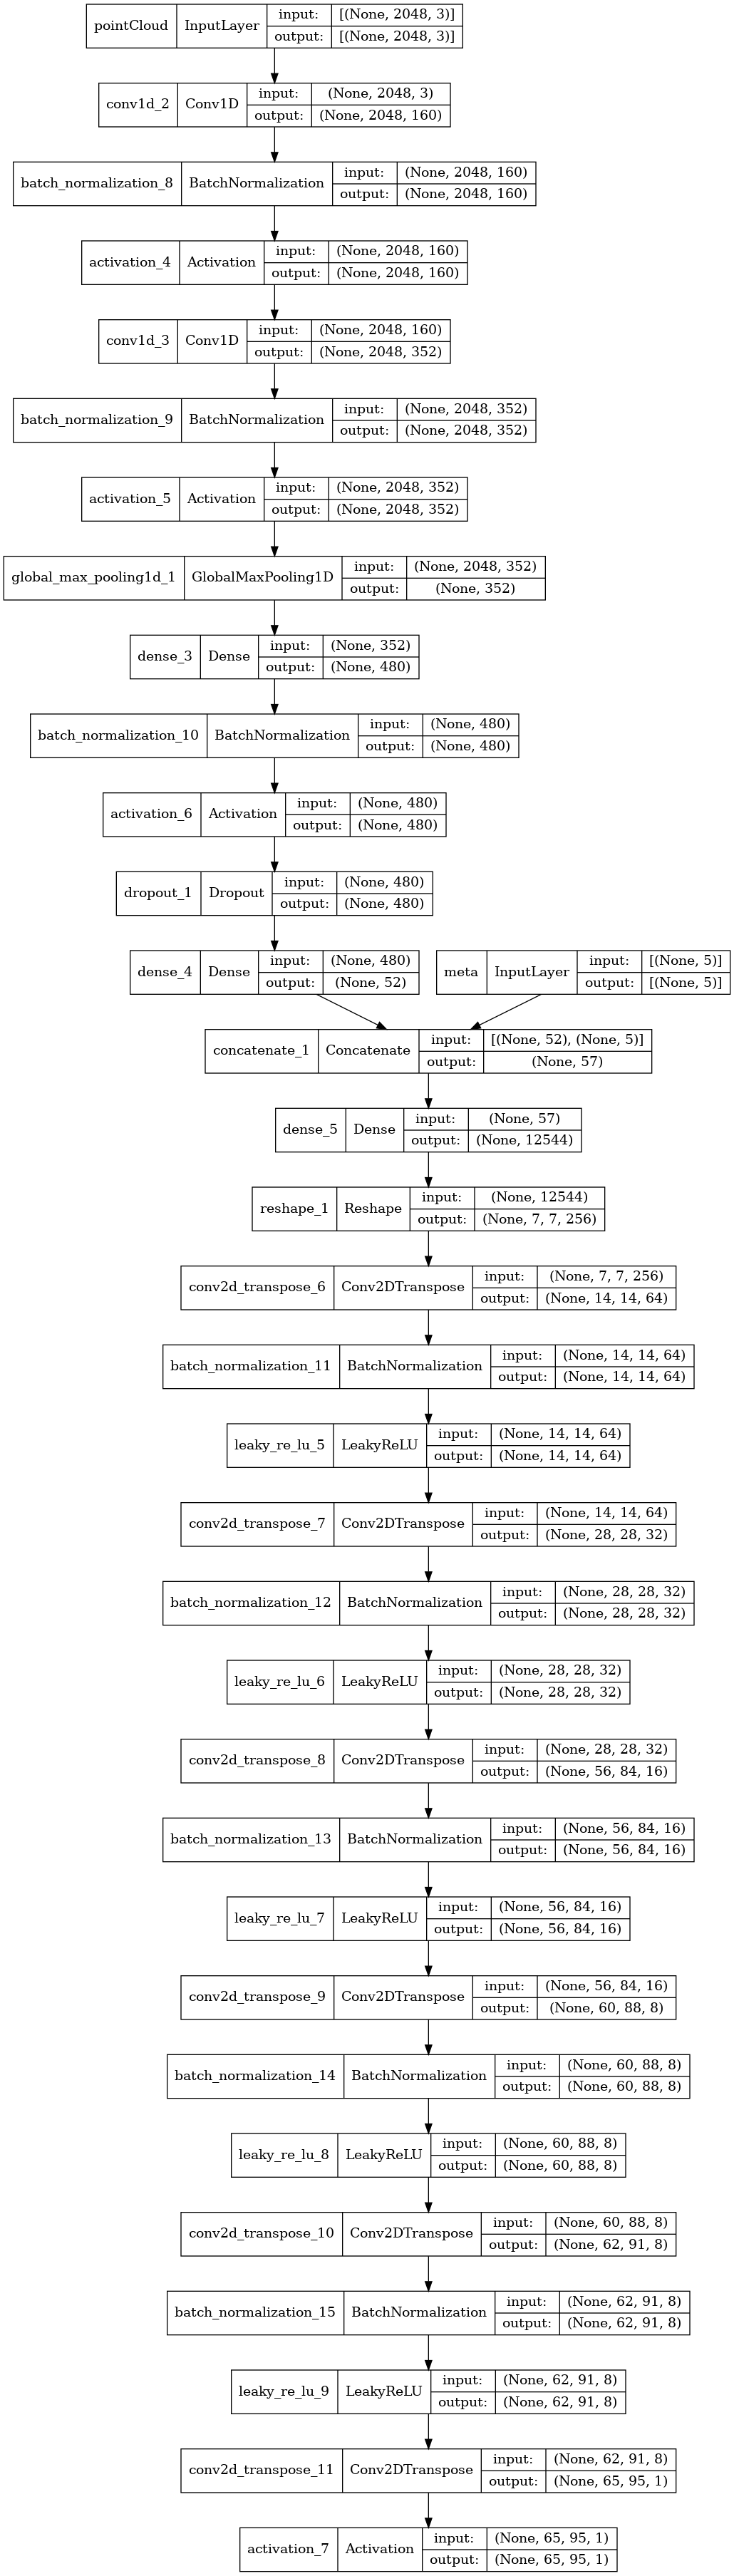

In [90]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

keras.utils.plot_model(model, show_shapes=True)


In [91]:
from tensorflow.keras.callbacks import EarlyStopping

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = model.fit(
   {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, Y_fit,
    epochs = 100,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, Y_test),
    callbacks=[estop]
)

Epoch 1/100
30/30 [==============================] - 2s 38ms/step - loss: 0.3796 - mae: 0.4742 - val_loss: 0.3630 - val_mae: 0.4792
Epoch 2/100
30/30 [==============================] - 1s 22ms/step - loss: 0.1744 - mae: 0.3292 - val_loss: 0.3066 - val_mae: 0.4988
Epoch 3/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0779 - mae: 0.1738 - val_loss: 0.2866 - val_mae: 0.5013
Epoch 4/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0533 - mae: 0.1348 - val_loss: 0.2705 - val_mae: 0.4843
Epoch 5/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0424 - mae: 0.1163 - val_loss: 0.2567 - val_mae: 0.4636
Epoch 6/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0311 - mae: 0.0992 - val_loss: 0.2539 - val_mae: 0.4496
Epoch 7/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0258 - mae: 0.0881 - val_loss: 0.2441 - val_mae: 0.4197
Epoch 8/100
30/30 [==============================] - 1s 22ms/step - loss: 0.

In [92]:
import pandas as pd

def plot_history(history:dict):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    # plt.ylim(0., 5.)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

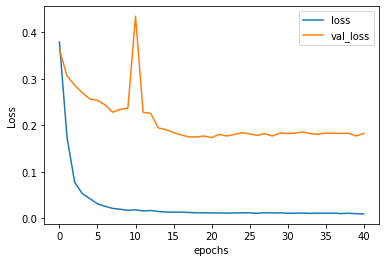

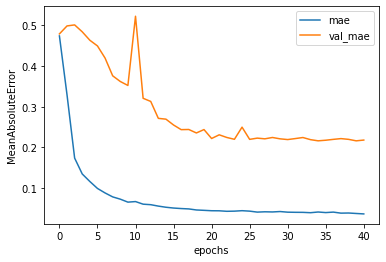

In [93]:
plot_history(best_history.history)

In [94]:
Y_train_pred = model.predict({'pointCloud':X_pc_train, 'meta':X_meta_train})
Y_val_pred = model.predict({'pointCloud':X_pc_val, 'meta':X_meta_val})
Y_test_pred = model.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

In [95]:
Y_train_pred = Y_train_pred.reshape(-1 , max_height, max_width)
Y_val_pred = Y_val_pred.reshape(-1 , max_height, max_width)
Y_test_pred = Y_test_pred.reshape(-1 , max_height, max_width)

In [108]:
import importlib
import show_mod
importlib.reload(show_mod)

<module 'show_mod' from '/home/i9-10920x/ML/modules/show_mod.py'>

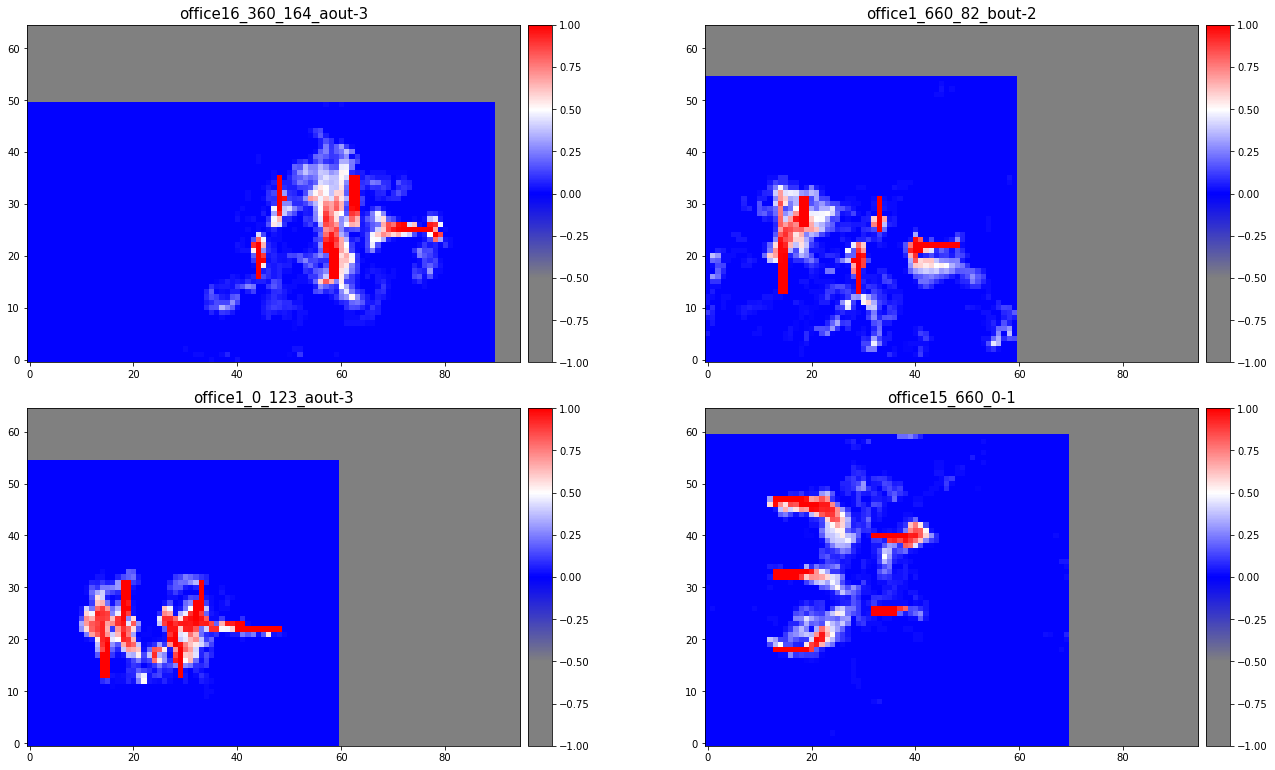

In [109]:
#訓練データの正解値
# train_target_2D = train_target.to_numpy()
# train_target_3D = train_target_2D.reshape(-1 , max_num_row, max_num_column)
show_mod.show_images(Y_train, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

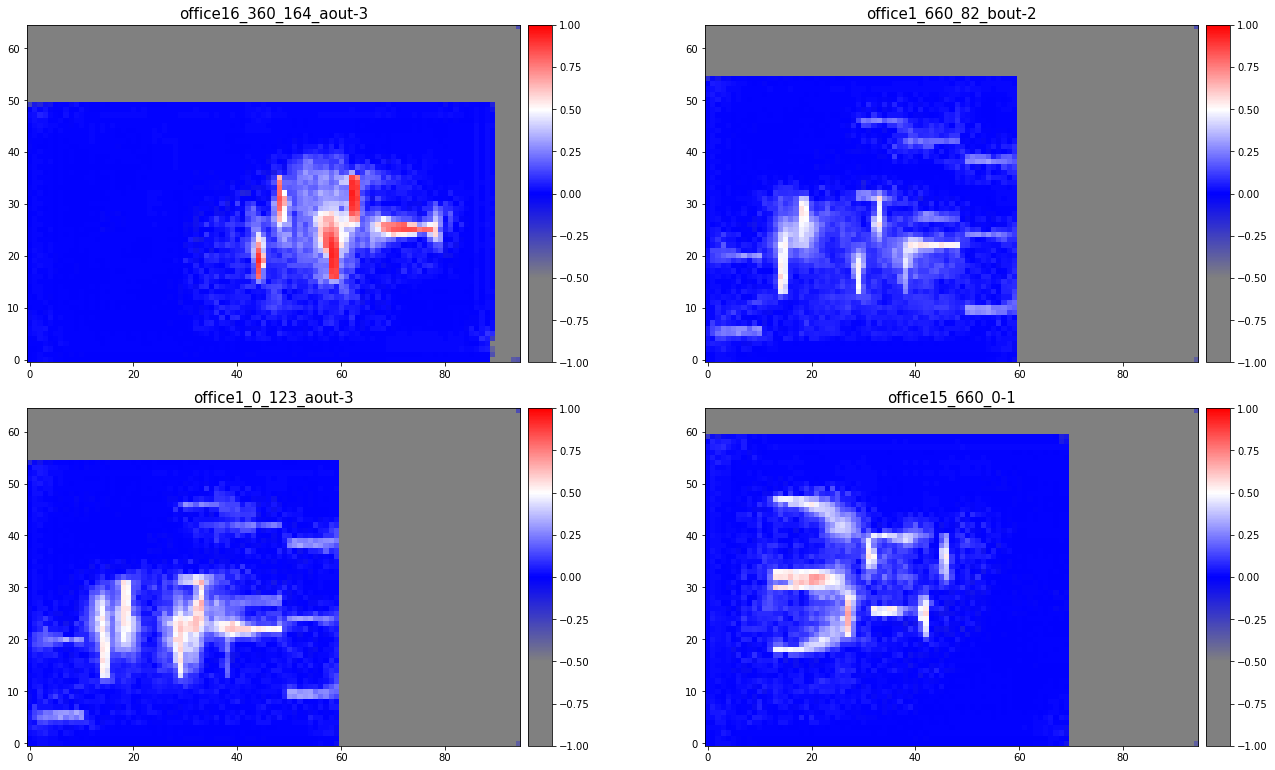

In [110]:
#訓練データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_train_pred, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

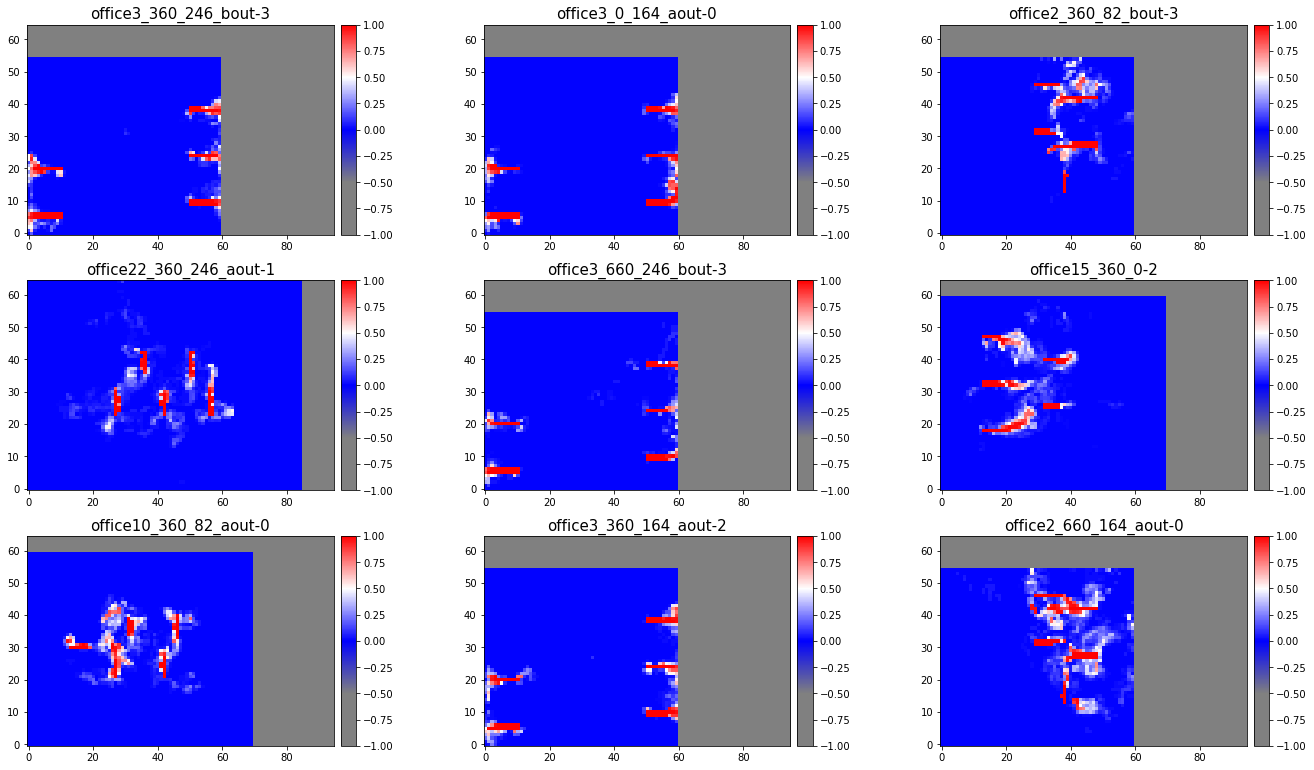

In [111]:
#検証データの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

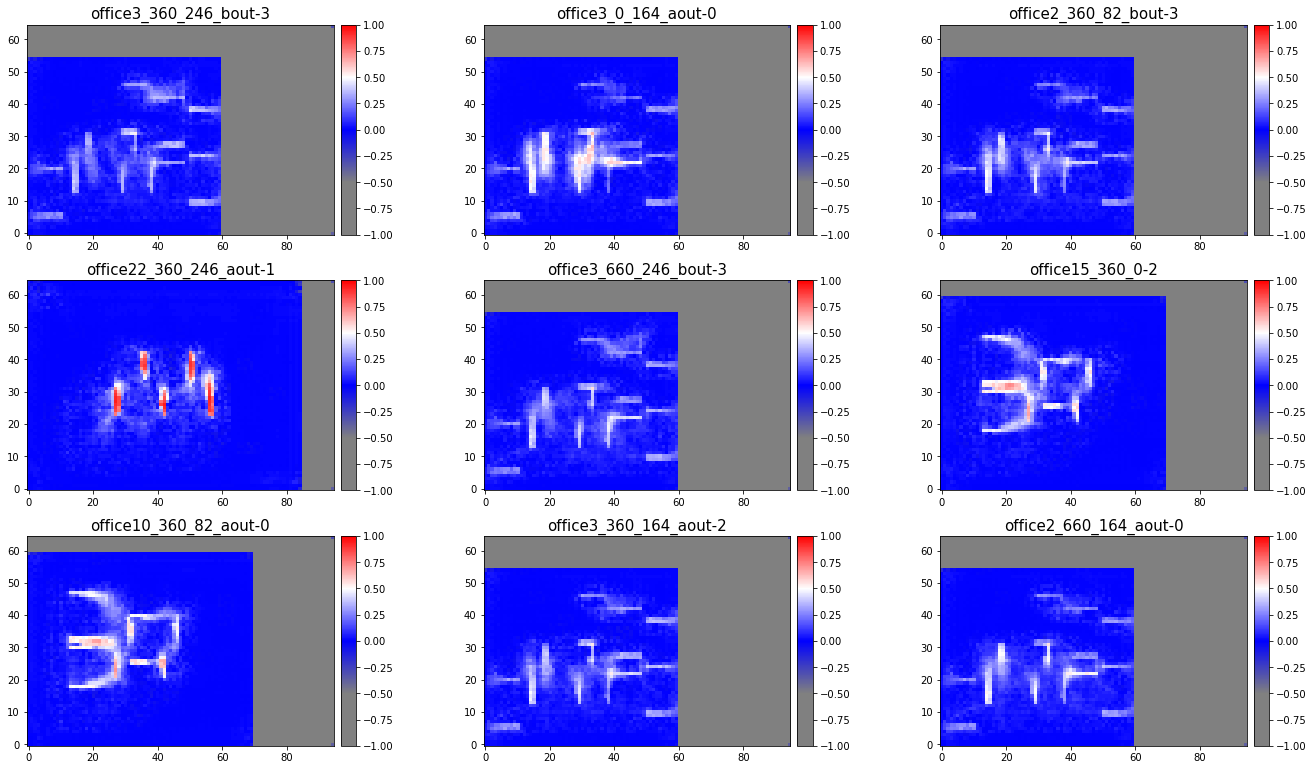

In [112]:
#検証データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val_pred, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

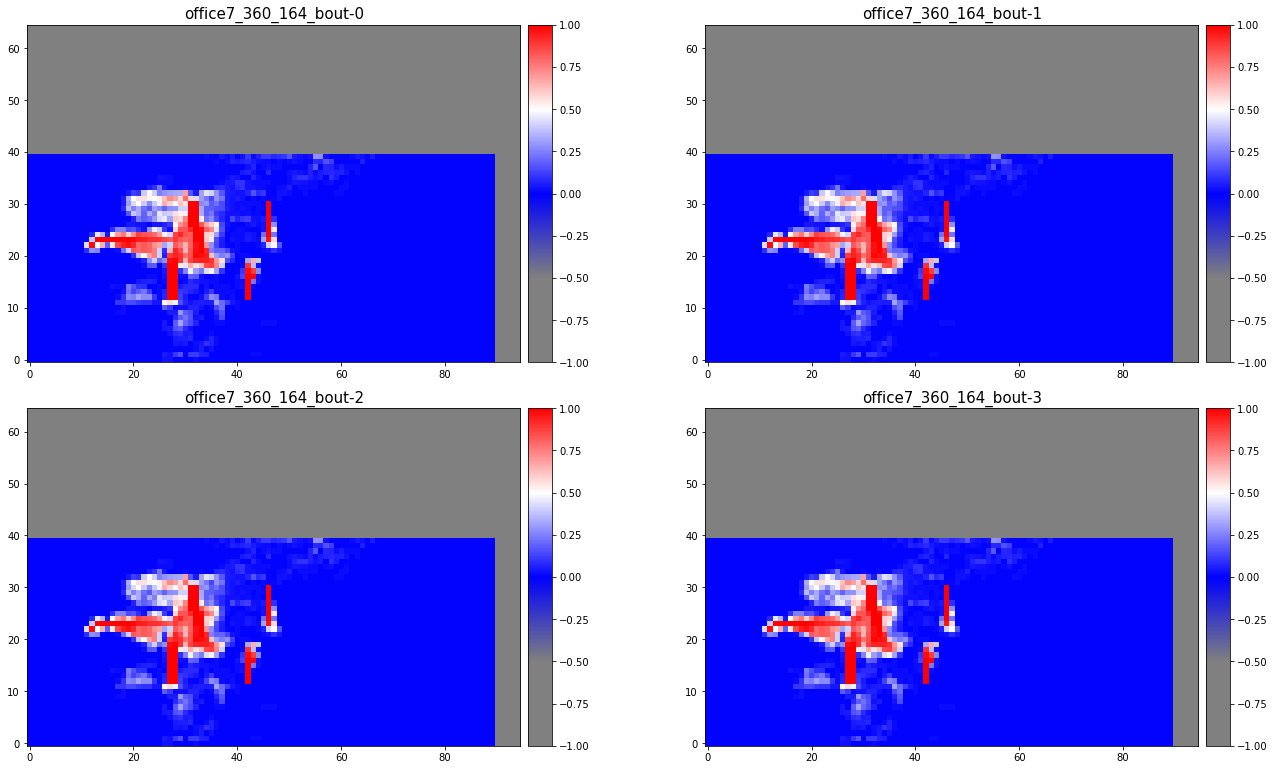

In [113]:
#テストデータの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)

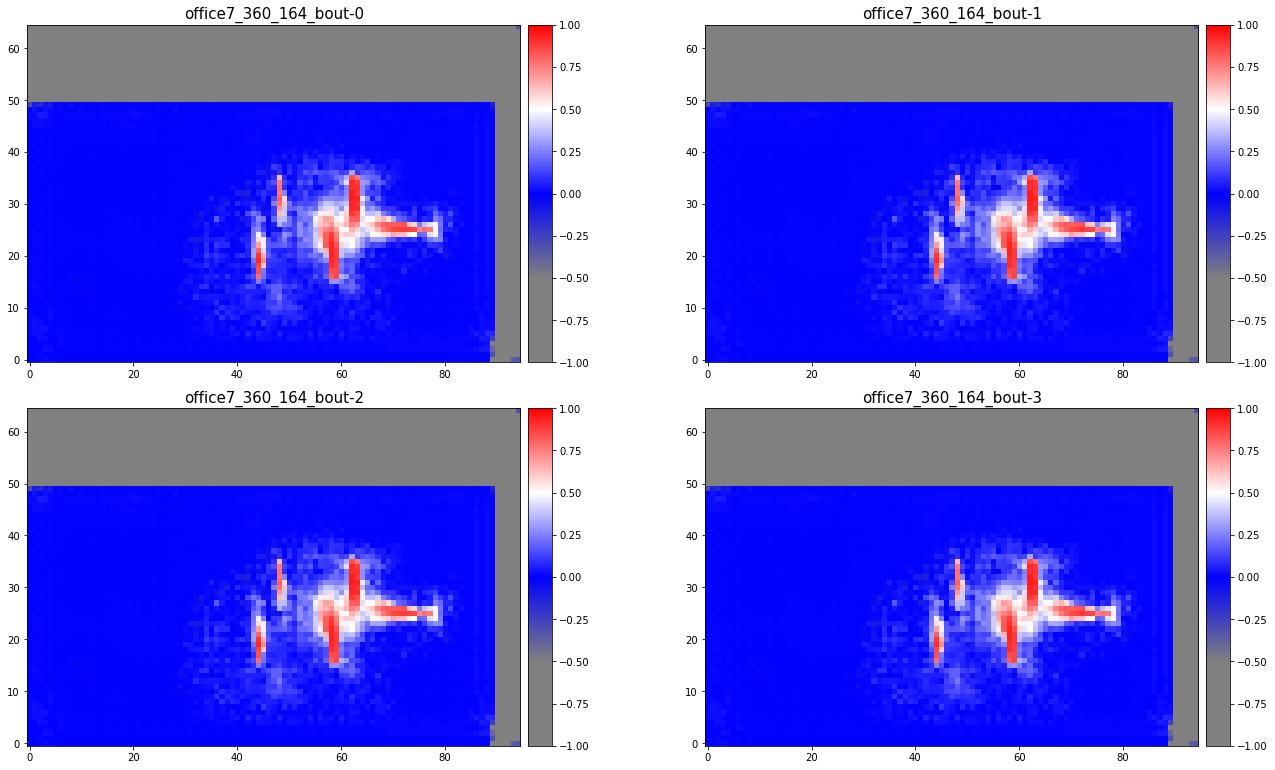

In [114]:
#テストデータの予測値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test_pred, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)